# PySpark DataFrames

In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

from pyspark.sql.types import *
from pyspark.sql.functions import *

sc = SparkContext(master = "local" \
                , appName = "PySpark DataFrames") 

# Create a spark session 
spark = SparkSession(sc)
#spark = SparkSession.builder.getOrCreate()

## Loading CSV into DataFrame

Loading data from CSV file is the most common method of creating DataFrames. In this exercise, you'll create a PySpark DataFrame from a `people.csv` file that is already provided to you as a `file_path` and confirm the created object is a PySpark DataFrame.

In [2]:
file_path = path = "/home/danae/Documents/pySparkTraining/files/people.csv"
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header = True, inferSchema = True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [3]:
# Print the first 5 observations 
people_df.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



## Inspecting data in PySpark DataFrame

Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc.

In [4]:
# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}"
      .format(len(people_df.columns), people_df.columns))

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


## PySpark DataFrame subsetting and cleaning

After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset `'name'`, `'sex'` and `'date of birth'` columns from `people_df` DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

In [5]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 5 observations from people_df_sub
people_df_sub.show(5)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

+--------------+------+-------------+
|          name|   sex|date of birth|
+--------------+------+-------------+
|Penelope Lewis|female|   1990-08-31|
| David Anthony|  male|   1971-10-14|
|     Ida Shipp|female|   1962-05-24|
|  Joanna Moore|female|   2017-03-10|
|Lisandra Ortiz|female|   2020-08-05|
+--------------+------+-------------+
only showing top 5 rows



In [6]:
# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates"\
      .format(people_df_sub.count(), people_df_sub_nodup.count()))

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


## Filtering your DataFrame

What if you want to subset the DataFrame based on a condition? (for example, select all rows where the sex is Female). In this example, you will filter the rows in the `people_df` DataFrame in which `'sex'` is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

In [7]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the\
people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in thepeople_df_male DataFrame


## Running SQL Queries Programmatically

DataFrames can easily be manipulated using SQL queries in PySpark. The `sql()` function on a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this example, you'll create a temporary table of the `people_df` DataFrame that you created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

In [8]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = 'SELECT name FROM people'

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 5 names of the people
people_df_names.show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows



## SQL queries for filtering Table
In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this example, we will use the temporary table `people` that you created previously and filter out the rows where the `"sex"` is male and female and create two DataFrames.

In [9]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df\
 DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## PySpark DataFrame visualization

Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of `names_df` DataFrame that you created earlier, then convert the `names_df` to Pandas DataFrame and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

In [10]:
people_df = people_df.withColumn("current_date", current_date())

people_df = people_df.withColumn("age", 
              round(months_between("current_date", to_date("date of birth"))/12,0))

In [11]:
people_df.show(5)

+---+---------+--------------+------+-------------+------------+----+
|_c0|person_id|          name|   sex|date of birth|current_date| age|
+---+---------+--------------+------+-------------+------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|  2020-10-31|30.0|
|  1|      101| David Anthony|  male|   1971-10-14|  2020-10-31|49.0|
|  2|      102|     Ida Shipp|female|   1962-05-24|  2020-10-31|58.0|
|  3|      103|  Joanna Moore|female|   2017-03-10|  2020-10-31| 4.0|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|  2020-10-31| 0.0|
+---+---------+--------------+------+-------------+------------+----+
only showing top 5 rows



In [12]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("names")

query = 'SELECT name, age FROM names LIMIT 10'

# Assign the result of Spark's query to people_df_names
names_df = spark.sql(query)
names_df.show(5)

+--------------+----+
|          name| age|
+--------------+----+
|Penelope Lewis|30.0|
| David Anthony|49.0|
|     Ida Shipp|58.0|
|  Joanna Moore| 4.0|
|Lisandra Ortiz| 0.0|
+--------------+----+
only showing top 5 rows



In [13]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

The column names of names_df are ['name', 'age']


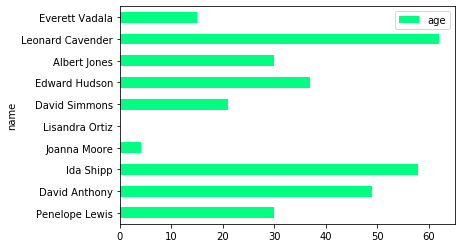

In [14]:
import matplotlib.pyplot as plt

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='name', y='age', colormap='winter_r')
plt.show()

In [15]:
query = 'SELECT age FROM names LIMIT 100'

# Assign the result of Spark's query to people_df_names
ages = spark.sql(query)
# Generate basic statistics
ages.describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               100|
|   mean|             34.45|
| stddev|21.759648968499548|
|    min|              -9.0|
|    max|             112.0|
+-------+------------------+



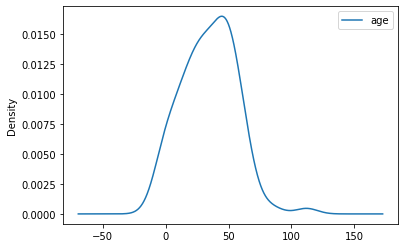

In [16]:
# Plot the 'Age' density 
ages = ages.toPandas()

ages.plot(kind='density')
plt.show()

In [17]:
sc.stop() # close the spark session